In [2]:
import numpy as np         # para fazer contas e mexer com matrizes
import pandas as pd        # para montar DataFrames (tabelas de bancos de dados)

from pathlib import Path   # para trabalhar com diretorios e arquivos
import pickle              # para gravar e ler dados

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

#import class_pig  
#import glob
#import seaborn as sns
#
#plt.style.use('ggplot')

#import os
#from scipy.optimize import curve_fit
#"""
#CUIDADO!!
#"""
#import warnings
#warnings.filterwarnings("ignore")

In [28]:
# função usada para fitar o modelo PV sigmoide (doente)
#                b                                   b
# V(x) = a + ----------------------   = a + ------------------------
#            1 + exp(-(x/d) + (c/d)          1 + exp(-x/d).exp(c/d)
#
# lim (x-> inf)  V(x) = a + b
def sigmoidvenegas1(x, a, b, c, d):
    return a + b/(1 + np.exp(-(x-c)/d))

def sigmoidpaiva(x,TLC,k1,k2):
    return TLC/(1+(k1*np.exp(-k2*x)))

def sigmoidvenegas2(x,TLC,B,k,c,d):
    return (TLC-(B*np.exp(-k*x)))/(1 - np.exp(-(x-c)/d))

def expsalazar(x,Vo,K):
    return Vo*(1-np.exp(-K*x))



# Lendo dados

In [29]:
# verifica quais dados estão disponíveis para análise
for file_name in Path('porquinhos').rglob('*.pickle'):
    print(file_name.name)

porquinho_mra26.pickle
porquinho_mra28.pickle
porquinho_mra29.pickle
porquinho_mra31.pickle
porquinho_mra32.pickle
porquinho_mra33.pickle
porquinho_mra34.pickle


In [30]:
"""
lista de dataframe: Cada elemento da lista corresponde a um dataframe de um porco/manobra/dados PV
"""
dataframes_lst = []

for file_name in Path('porquinhos').rglob('*.pickle'):
    
    print(f"\rLendo {file_name.name}\t\t\t")

    with open(file_name, "rb") as file: # abre o arquivo.pickle

        porquinho = pickle.load(file)
        for manobra in porquinho: #Para cada manobra 

            if manobra == "D": # Posso fazer 3,4,5 passos
                n_steps = 5
            elif manobra == "C": # Posso fazer 3,4 passos
                n_steps = 4
            elif manobra == "B": # Posso fazer 3 passos
                n_steps = 3

            # Formato os dados de entrada
            format_data = []

            for pi, pe, wi, we in zip(porquinho[manobra]["p_i"], porquinho[manobra]["p_e"],
                                      porquinho[manobra]["w_i"], porquinho[manobra]["w_e"]):

                format_data.extend([pi,wi,pe,we])

            format_data = np.array(format_data).reshape(-1,2) # monta matriz de N linhas e 2 colunas
            

            ##########################################################
            caso = []
            caso.append(porquinho.name)
            caso.append(manobra)
            caso.append(format_data)
            caso.append(n_steps)
            casodf = pd.DataFrame(caso, index = ['Animal', 'Manobra', 'Dados', 'n_steps']).T
            dataframes_lst.append(casodf)


Lendo porquinho_mra26.pickle			
Lendo porquinho_mra28.pickle			
Lendo porquinho_mra29.pickle			
Lendo porquinho_mra31.pickle			
Lendo porquinho_mra32.pickle			
Lendo porquinho_mra33.pickle			
Lendo porquinho_mra34.pickle			


In [31]:
dadosdf = pd.concat(dataframes_lst, ignore_index=True)

In [32]:
dadosdf.head(4)

,Animal,Manobra,Dados,n_steps
0,mra26,B,"[[10.25, -145.76797485351562], [20.61562538146...",3
1,mra26,D,"[[10.178125381469727, -197.8517303466797], [20...",5
2,mra26,C,"[[10.131250381469727, -147.3227081298828], [20...",4
3,mra28,C,"[[10.287500381469727, -152.2864532470703], [20...",4


In [33]:
caso_teste = 15
dadosdf.iloc[caso_teste]

Animal                                                 mra33
Manobra                                                    D
Dados      [[10.312239646911621, -75.62246704101562], [20...
n_steps                                                    5
Name: 15, dtype: object

In [34]:
dadosdf.iloc[caso_teste].Dados

array([[  10.31223965,  -75.62246704],
       [  20.05546951,   84.0883255 ],
       [  14.99140644,  107.81485748],
       [  25.18541718,  233.03657532],
       [  20.00651073,  363.42288208],
       [  30.22552109,  501.05053711],
       [  24.99192715,  706.1350708 ],
       [  35.26276207,  833.0881958 ],
       [  30.10989571, 1131.9465332 ],
       [  40.40755272, 1222.84228516]])

In [35]:
def Data2PV(data):
    data2 = data[0::2, :]
    pressures = data2[:,0]
    volumes = data2[:,1]
    return pressures,volumes

In [36]:
pv_lst = []
for idx,caso in dadosdf.iterrows():
    pv = []
    #print(f'{caso.Animal} {caso.Manobra}')
    ps,vs = Data2PV(caso.Dados)
    #pv.append(idx)
    pv.append(ps)
    pv.append(vs)
    pvdf = pd.DataFrame([pv], columns = ['Pressoes', 'Volumes'])
    pv_lst.append(pvdf)
    #parameters, pcov = curve_fit(func, 
    #                                                     self.interp_pressures,  
    #                                                     self.interp_volumes, 
    #                                                     method=estimator,
    #                                                     bounds=meus_bounds)


In [37]:
pvdf_all = pd.concat(pv_lst, ignore_index=True)
pvdf_all.head(5)

,Pressoes,Volumes
0,"[10.25, 15.334375381469727, 20.375]","[-145.76797485351562, -37.26432800292969, 166...."
1,"[10.178125381469727, 15.212499618530273, 20.42...","[-197.8517303466797, -95.13343811035156, 97.13..."
2,"[10.131250381469727, 15.112500190734863, 20.27...","[-147.3227081298828, -36.04450607299805, 131.8..."
3,"[10.287500381469727, 14.931250095367432, 20.21...","[-152.2864532470703, -45.45492172241211, 234.1..."
4,"[10.021874904632568, 14.962499618530273, 20.01...","[-128.87612915039062, -2.0903725624084473, 208..."


In [38]:
dadosdf2 = pd.concat((dadosdf,pvdf_all),axis=1)


In [39]:
dadosdf2

,Animal,Manobra,Dados,n_steps,Pressoes,Volumes
0,mra26,B,"[[10.25, -145.76797485351562], [20.61562538146...",3,"[10.25, 15.334375381469727, 20.375]","[-145.76797485351562, -37.26432800292969, 166...."
1,mra26,D,"[[10.178125381469727, -197.8517303466797], [20...",5,"[10.178125381469727, 15.212499618530273, 20.42...","[-197.8517303466797, -95.13343811035156, 97.13..."
2,mra26,C,"[[10.131250381469727, -147.3227081298828], [20...",4,"[10.131250381469727, 15.112500190734863, 20.27...","[-147.3227081298828, -36.04450607299805, 131.8..."
3,mra28,C,"[[10.287500381469727, -152.2864532470703], [20...",4,"[10.287500381469727, 14.931250095367432, 20.21...","[-152.2864532470703, -45.45492172241211, 234.1..."
4,mra28,B,"[[10.021874904632568, -128.87612915039062], [2...",3,"[10.021874904632568, 14.962499618530273, 20.01...","[-128.87612915039062, -2.0903725624084473, 208..."
5,mra28,D,"[[10.240625381469727, -179.3195037841797], [20...",5,"[10.240625381469727, 14.828125, 20.05937480926...","[-179.3195037841797, -62.187042236328125, 182...."
6,mra29,D,"[[10.286250114440918, -210.43722534179688], [2...",5,"[10.286250114440918, 15.094120502471924, 19.99...","[-210.43722534179688, -118.89096069335938, 33...."
7,mra29,B,"[[10.26111125946045, -307.4459228515625], [20....",3,"[10.26111125946045, 15.117916584014893, 20.029...","[-307.4459228515625, -156.31631469726562, 16.6..."
8,mra29,C,"[[10.105555534362793, -265.270263671875], [20....",4,"[10.105555534362793, 15.18842601776123, 20.045...","[-265.270263671875, -145.95188903808594, 74.12..."
9,mra31,D,"[[10.0, -107.7169418334961], [20.2000007629394...",5,"[10.0, 15.0, 20.100000381469727, 24.8999996185...","[-107.7169418334961, 47.35507583618164, 235.19..."


[-294.67551441 1695.33852578   28.10570415    6.39623691]
mra26


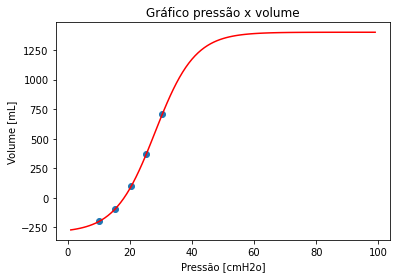

[-297.05994796 1381.37407782   23.66987602    5.63017175]
mra28


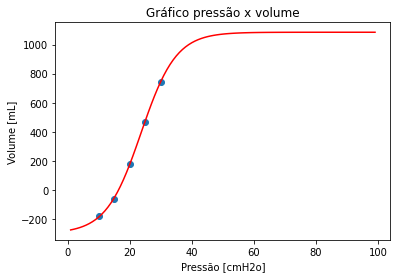

[-247.55701301  968.97506803   23.70543175    4.35256343]
mra29


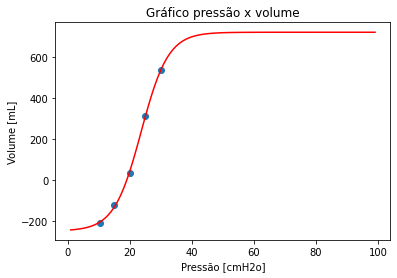

[-330.8312787  1143.7978598    20.14734166    7.18400213]
mra31


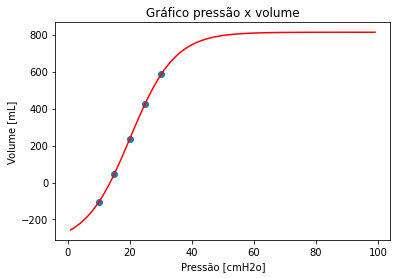

[-139.55927647  634.25670264   20.55392719    5.33333494]
mra32


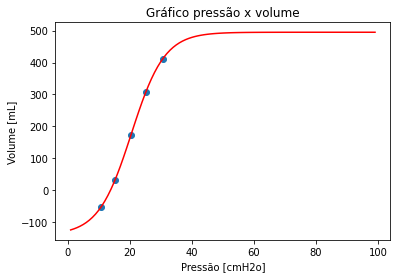

[-500.91278271 4760.42204105   37.8127808    11.85675946]
mra33


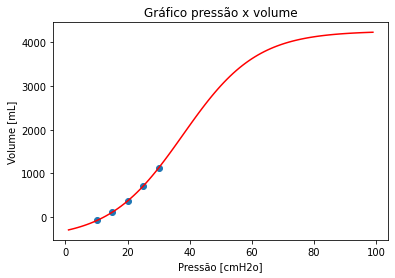

[2.66917938e+02 9.53782050e+01 7.42308298e+05 1.04826902e+05]
mra34


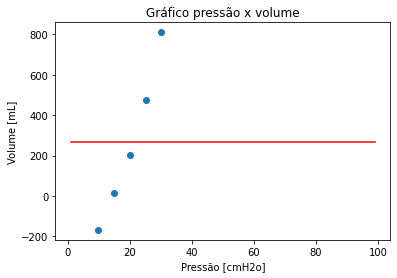

In [47]:
for i in range(21):
    caso_teste=i
    metodo = 'lm' # lm, dogbox, trf
    modelo = sigmoidvenegas1
    if dadosdf2.iloc[caso_teste].n_steps ==:
        p = dadosdf2.iloc[caso_teste].Pressoes
        v = dadosdf2.iloc[caso_teste].Volumes
        parameters, pcov = curve_fit(modelo, p, v, method=metodo)
        print(parameters)
        print(dadosdf2.iloc[caso_teste].Animal)
        meu_p = range(1,100)
        meu_v = modelo(meu_p,*parameters)
        plt.scatter(dadosdf2.iloc[caso_teste].Pressoes,v)
        plt.plot(meu_p,meu_v,'r')
        plt.title('Gráfico pressão x volume')
        plt.xlabel('Pressão [cmH2o]')
        plt.ylabel('Volume [mL]')
        plt.show()
        plt.close()


In [ ]:
#meu_p0 = [0, 2000, 20, 20]
#for idx,caso in dadosdf2.iterrows():
#    print(f'Fitando {caso.Animal}_{caso.Manobra}')
#    parameters, pcov = curve_fit(sigmoid, caso.Pressoes, caso.Volumes, method='lm')
#    print(parameters)
#    meu_p = range(1,100)
#    volume_fitado = sigmoid(meu_p,*parameters)
#    plt.plot(caso.Pressoes,caso.Volumes)
#    plt.plot(meu_p,volume_fitado)
#    plt.show()
    #                                                     self.interp_pressures,  
    #                                                     self.interp_volumes, 
    #                                                     method=estimator,
    #                                                     bounds=meus_bounds)